<a href="https://colab.research.google.com/github/rikuProgramer/Kikagaku_DeepLearningHands-onCourse/blob/main/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像処理の基礎

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/キカガク/ディープラーニングハンズオンコース/画像処理/sample.png')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(225, 225, 3)

In [ ]:
img.dtype

dtype('uint8')

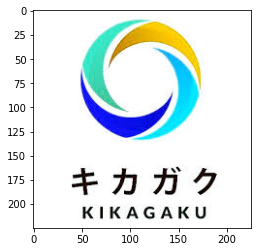

In [ ]:
plt.imshow(img)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

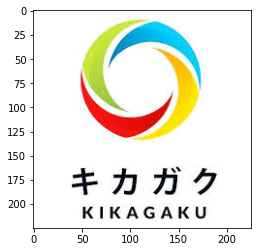

In [ ]:
plt.imshow(img_rgb)

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/drive/MyDrive/キカガク/ディープラーニングハンズオンコース/画像処理/sample.png')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

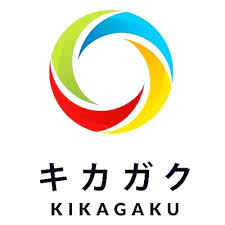

In [ ]:
img

In [ ]:
img = np.array(img)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(225, 225, 3)

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
img_gray.shape, img.shape

((225, 225), (225, 225, 3))

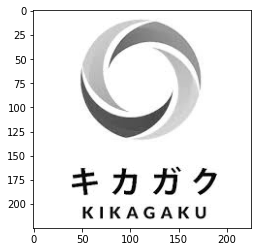

In [ ]:
plt.imshow(img_gray, cmap='gray')

In [ ]:
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

In [ ]:
img_conv = cv2.filter2D(img_gray, -1, kernel)

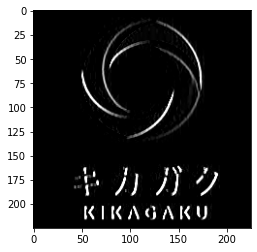

In [ ]:
plt.imshow(img_conv, cmap='gray')

In [ ]:
kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [ ]:
img_conv = cv2.filter2D(img_gray, -1, kernel)

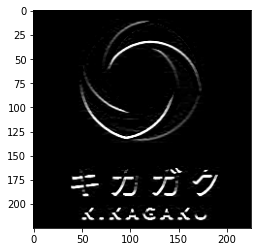

In [ ]:
plt.imshow(img_conv, cmap='gray')

# 畳み込みニューラルネットワーク

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
train = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
len(train)

60000

In [ ]:
type(train[0])

tuple

In [ ]:
train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
train[0][1]

5

In [ ]:
train[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
img = np.transpose(train[0][0], (1, 2, 0))

In [ ]:
img.shape

torch.Size([28, 28, 1])

In [ ]:
img = img.reshape(img.shape[0], img.shape[1])

In [ ]:
img.shape

torch.Size([28, 28])

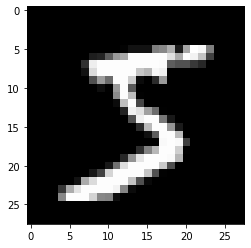

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
x = train[0][0]
x.shape

torch.Size([1, 28, 28])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

conv = nn.Conv2d(
    in_channels=1,
    out_channels=4,
    kernel_size=3,
    stride=1,
    padding=1
)

conv.weight

Parameter containing:
tensor([[[[ 0.1757, -0.0745,  0.3223],
          [ 0.3206,  0.3295,  0.0986],
          [-0.0535,  0.1027, -0.2104]]],


        [[[ 0.0966, -0.1882, -0.0383],
          [-0.0094,  0.1436,  0.0071],
          [-0.2745,  0.0445, -0.2962]]],


        [[[ 0.0025,  0.3246, -0.3271],
          [ 0.1862,  0.2884,  0.0377],
          [ 0.1171,  0.2298, -0.1386]]],


        [[[ 0.0587, -0.3264,  0.2750],
          [-0.2710, -0.0463,  0.1565],
          [-0.1926,  0.0960, -0.3099]]]], requires_grad=True)

In [ ]:
conv.weight.shape

torch.Size([4, 1, 3, 3])

In [ ]:
conv.bias

Parameter containing:
tensor([-0.3054,  0.1562, -0.1208,  0.0786], requires_grad=True)

In [ ]:
conv.bias.shape

torch.Size([4])

In [ ]:
x = x.reshape(1, 1, 28, 28)
x = conv(x)
x

tensor([[[[-0.3054, -0.3054, -0.3054,  ..., -0.3054, -0.3054, -0.3054],
          [-0.3054, -0.3054, -0.3054,  ..., -0.3054, -0.3054, -0.3054],
          [-0.3054, -0.3054, -0.3054,  ..., -0.3054, -0.3054, -0.3054],
          ...,
          [-0.3054, -0.3054, -0.3054,  ..., -0.3054, -0.3054, -0.3054],
          [-0.3054, -0.3054, -0.3054,  ..., -0.3054, -0.3054, -0.3054],
          [-0.3054, -0.3054, -0.3054,  ..., -0.3054, -0.3054, -0.3054]],

         [[ 0.1562,  0.1562,  0.1562,  ...,  0.1562,  0.1562,  0.1562],
          [ 0.1562,  0.1562,  0.1562,  ...,  0.1562,  0.1562,  0.1562],
          [ 0.1562,  0.1562,  0.1562,  ...,  0.1562,  0.1562,  0.1562],
          ...,
          [ 0.1562,  0.1562,  0.1562,  ...,  0.1562,  0.1562,  0.1562],
          [ 0.1562,  0.1562,  0.1562,  ...,  0.1562,  0.1562,  0.1562],
          [ 0.1562,  0.1562,  0.1562,  ...,  0.1562,  0.1562,  0.1562]],

         [[-0.1208, -0.1208, -0.1208,  ..., -0.1208, -0.1208, -0.1208],
          [-0.1208, -0.1208, -

In [ ]:
x.shape

torch.Size([1, 4, 28, 28])

In [ ]:
x = F.max_pool2d(x, kernel_size=2, stride=2)
x.shape

torch.Size([1, 4, 14, 14])

In [ ]:
print('channels:', x.shape[1])
print('height:', x.shape[2])
print('width:', x.shape[3])

channels: 4
height: 14
width: 14


In [ ]:
x_shape = x.shape[1] * x.shape[2] * x.shape[3]
x_shape

784

In [ ]:
x = x.view(-1, x_shape)
x.shape

torch.Size([1, 784])

In [ ]:
fc = nn.Linear(x_shape, 10)
x = fc(x)
x

tensor([[-0.1769,  0.1270, -0.0273, -0.2113, -0.2420, -0.0610,  0.0213, -0.1416,
          0.2522, -0.1013]], grad_fn=<AddmmBackward0>)

In [ ]:
x.shape

torch.Size([1, 10])

# 画像のクラス分類

In [ ]:
!pip install -q pytorch_lightning
!pip install -q torchmetrics

     |████████████████████████████████| 708 kB 22.4 MB/s 
     |████████████████████████████████| 419 kB 42.6 MB/s 
     |████████████████████████████████| 5.9 MB 44.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.1 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import pytorch_lightning as pl
import torchmetrics
from torchmetrics.functional import accuracy
import torchsummary
from torchsummary import summary
from pytorch_lightning.loggers import CSVLogger

In [ ]:
#データセットの変換を定義
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
train_val = datasets.MNIST('./', train=True, download=True, transform=transform)
test = datasets.MNIST('./', train=False, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
len(train_val), len(test)

(60000, 10000)

In [ ]:
#train valに分割
n_train = 50000
n_val = 10000

torch.manual_seed(0)
train, val = torch.utils.data.random_split(train_val, [n_train, n_val])

len(train), len(val)

(50000, 10000)

In [ ]:
train[0][0].shape

torch.Size([1, 28, 28])

9

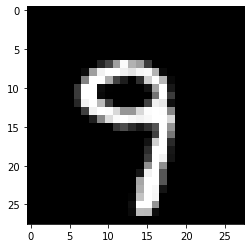

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train[0][0].reshape(28, 28), cmap='gray');
train[0][1]

In [ ]:
batch_size = 1024

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

In [ ]:
pl.seed_everything(0)

transform = transforms.Compose([
    transforms.ToTensor()
])

train_val = datasets.MNIST('./', train=True, download=True, transform=transform)
teset = datasets.MNIST('./', train=False, download=True, transform=transform)

n_train = 50000
n_val = 10000
train, val = torch.utils.data.random_split(train_val, [n_train, n_val])

batch_size = 1024

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

INFO:pytorch_lightning.utilities.seed:Global seed set to 0


In [ ]:
class Net(pl.LightningModule):

    def __init__(self):
        super().__init__()

        self.conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(3)
        self.fc = nn.Linear(588, 10)


    def forward(self, x):
        h = self.conv(x)
        h = F.relu(h)
        h = self.bn(h)
        h = F.max_pool2d(h, kernel_size=2, stride=2)
        h = h.view(-1, 588)
        h = self.fc(h)
        return h


    def training_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        self.log('train_acc', accuracy(y.softmax(dim=-1), t), on_step=True, on_epoch=True, prog_bar=True)
        return loss


    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log('val_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        self.log('test_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer

↓GPUに設定する必要があるので「ランタイム」から設定をいじる

In [ ]:
# 学習の実行
pl.seed_everything(0)
net = Net()
logger = CSVLogger(save_dir='logs', name='my_exp')
trainer = pl.Trainer(max_epochs=20, gpus=1, deterministic=True, logger=logger)
trainer.fit(net, train_loader, val_loader)

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:448: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type        | Params
-------------------------------------
0 | conv | Conv2d      | 30    
1 | bn   | BatchNorm2d | 6     


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1896: PossibleUserWarning: The number of training batches (48) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [ ]:
log = pd.read_csv('/content/logs/my_exp/version_0/metrics.csv')

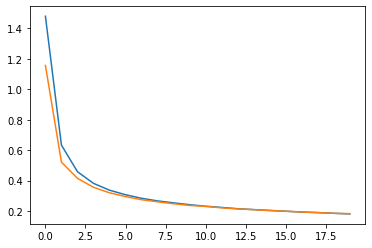

In [ ]:
log[['train_loss_epoch', 'epoch']].dropna(how='any', axis=0).reset_index()['train_loss_epoch'].plot();
log[['val_loss', 'epoch']].dropna(how='any', axis=0).reset_index()['val_loss'].plot();

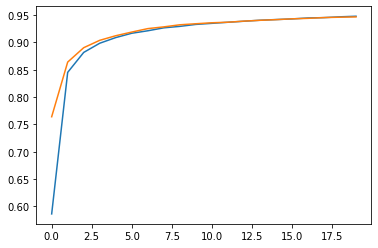

In [ ]:
log[['train_acc_epoch']].dropna(how='any', axis=0).reset_index()['train_acc_epoch'].plot();
log[['val_acc', 'epoch']].dropna(how='any', axis=0).reset_index()['val_acc'].plot();

In [ ]:
results = trainer.test(dataloaders=test_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1390: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  + f" You can pass `.{fn}(ckpt_path='best')` to use the best model or"
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at logs/my_exp/version_0/checkpoints/epoch=19-step=960.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from checkpoint at logs/my_exp/version_0/checkpoints/epoch=19-step=960.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9526000022888184
        test_loss           0.16655661165714264
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
torch.save(net.state_dict(), 'mnist.py')

In [ ]:
net = Net().cpu().eval()

In [ ]:
net.load_state_dict(torch.load('mnist.py', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
x, t = test[0]

y = net(x.unsqueeze(0))
print(y)

tensor([[-0.5376, -7.8739, -0.3183,  2.4443, -4.2833, -1.1083, -6.4272, 11.8482,
         -0.2134,  4.5676]], grad_fn=<AddmmBackward0>)


In [ ]:
y = F.softmax(y)
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[4.1744e-06, 2.7193e-09, 5.1979e-06, 8.2341e-05, 9.8595e-08, 2.3589e-06,
         1.1554e-08, 9.9921e-01, 5.7728e-06, 6.8822e-04]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
y = torch.argmax(y)
print(y)

tensor(7)


In [ ]:
t

7

# ファインチューニング

In [ ]:
!pip install -q pytorch_lightning
!pip install -q torchmetrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import pytorch_lightning as pl
import torchmetrics
from torchmetrics.functional import accuracy
import torchsummary
from torchsummary import summary
from pytorch_lightning.loggers import CSVLogger